In [ ]:
!pip install gtts 
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os # operating system - 폴더 처리, 경로 
import numpy as np # number 다룸
import random # random 숫자를 가져오기 

from gtts import gTTS # text to speech 
import librosa
import IPython

import matplotlib.pyplot as plt 

In [ ]:
!ls

sample_data


In [ ]:
os.makedirs('samples') # exist_ok=True 원래 있어도 상관 없음 

In [ ]:
os.listdir('.')

['.config', 'samples', 'sample_data']

In [ ]:
lang = 'ko'

In [ ]:
letter = '여'
tts = gTTS(letter, lang=lang)
#tts.save('./samples/yeo.mp3')
tts.save('./samples/%s.mp3'%letter)

In [ ]:
letter_file_path = './samples/%s.mp3'%letter
x, sr = librosa.load(letter_file_path)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
print('x', x)

x [ 3.0600081e-06 -4.4910535e-06  9.2896125e-06 ... -4.1243189e-07
  2.7785333e-07 -1.6371385e-07]


In [ ]:
print('sr', sr) # sampling rate

sr 22050


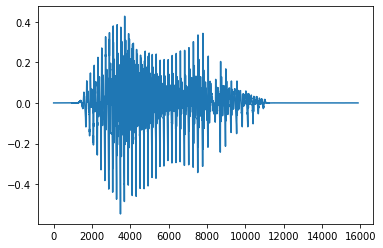

In [ ]:
plt.plot(x)

In [ ]:
IPython.display.Audio(data=x, rate=sr)

## 한글자 이상

In [ ]:
string = '여러분 안녕하세요'
data_x = []

for letter in string:

  if letter == ' ':
    x = np.zeros(10000) # 공백 지정 
  else:
    if not os.path.isfile('./samples/%s.mp3'%letter) :  # 파일이 있을시 저장 안함
      print('파일 다운로드 및 저장 필요')
      tts = gTTS(letter, lang=lang)
      tts.save('./samples/%s.mp3'%letter)

    letter_file_path = './samples/%s.mp3'%letter
    x, sr = librosa.load(letter_file_path)

  data_x= np.append(data_x, x) 

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

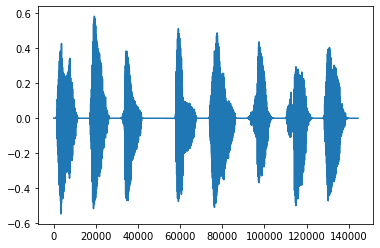

In [ ]:
plt.plot(data_x)

In [ ]:
IPython.display.Audio(data=data_x, rate=sr)

## 음성 변조

In [ ]:
random_factor = 12
octaves = 1 + random.random() * random_factor
new_sound_1 = librosa.effects.pitch_shift(x, sr, octaves) # 옥타브 : 음성 목소리를 바꿔줌 

In [ ]:
IPython.display.Audio(data=new_sound_1, rate=sr)

In [ ]:
resample_sr = sr * 0.7
new_sound_2 = librosa.resample(new_sound_1, sr, resample_sr)

In [ ]:
IPython.display.Audio(data=new_sound_2, rate=resample_sr)

In [ ]:
print('new_sound_1.shape', new_sound_1.shape)
print('new_sound_2.shape', new_sound_2.shape)

new_sound_1.shape (15876,)
new_sound_2.shape (11114,)


In [ ]:
string = '여러분 안녕하세요'
data_x = []

random_factor = 20
octaves = 3 + random.random() * random_factor

for letter in string:

  if letter == ' ':
    x = np.zeros(10000) # 공백 지정 
  else:
    if not os.path.isfile('./samples/%s.mp3'%letter) :  # 파일이 있을시 저장 안함
      print('파일 다운로드 및 저장 필요')
      tts = gTTS(letter, lang=lang)
      tts.save('./samples/%s.mp3'%letter)

    letter_file_path = './samples/%s.mp3'%letter
    x, sr = librosa.load(letter_file_path)

  new_sound_1 = librosa.effects.pitch_shift(x, sr, octaves)
  data_x= np.append(data_x, new_sound_1)  

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
IPython.display.Audio(data=data_x, rate=sr)

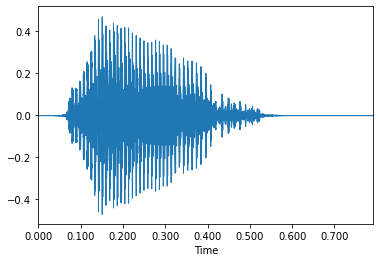

In [ ]:
import librosa.display 

librosa.display.waveplot(x, sr=sr)